In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
Advert=pd.read_csv('advertising.csv')

In [7]:
Advert

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [8]:
#missing values
Advert.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
#To convert Categorical dataset to Numerical, we have to encode each column
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
Advert['Ad Topic Line'] = le.fit_transform(Advert['Ad Topic Line'])

In [27]:
Advert['Country'] = le.fit_transform(Advert['Country'])

In [29]:
Advert['City'] = le.fit_transform(Advert['City'])

In [ ]:
Advert['City'] = le.fit_transform(Advert['City'])

In [ ]:
#converting from object to datetime

In [35]:
Advert['Timestamp'] = pd.to_datetime(Advert['Timestamp'])

In [48]:
# Convert the datetime column to Unix timestamps (integer representation of seconds )
Advert['unix_timestamp'] = (Advert['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(1, unit='s')

In [49]:
Advert

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,unix_timestamp
0,68.95,35,61833.90,256.09,91,961,0,215,2016-03-27 00:53:11,0,1459039991
1,80.23,31,68441.85,193.77,464,903,1,147,2016-04-04 01:39:02,0,1459733942
2,69.47,26,59785.94,236.50,566,111,0,184,2016-03-13 20:35:42,0,1457901342
3,74.15,29,54806.18,245.89,903,939,1,103,2016-01-10 02:31:19,0,1452393079
4,68.37,35,73889.99,225.58,766,805,0,96,2016-06-03 03:36:18,0,1464924978
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,345,126,1,116,2016-02-11 21:49:00,1,1455227340
996,51.30,45,67782.17,134.42,359,488,1,26,2016-04-22 02:07:01,1,1461290821
997,51.63,51,42415.72,120.37,263,798,1,140,2016-02-01 17:24:57,1,1454347497
998,55.55,19,41920.79,187.95,641,935,0,85,2016-03-24 02:35:54,0,1458786954


In [50]:
Advert.columns


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'unix_timestamp'],
      dtype='object')

In [51]:
X=Advert[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'unix_timestamp']]

In [52]:
Y= Advert['Clicked on Ad']

In [53]:
#Standardise
from sklearn.preprocessing import StandardScaler
stx = StandardScaler()
X = stx.fit_transform(X)

In [54]:
X

array([[ 0.24926659, -0.11490498,  0.50969109, ..., -0.96269532,
         1.42457152, -0.24461368],
       [ 0.96113227, -0.57042523,  1.00253021, ...,  1.03875025,
         0.45187483, -0.10820873],
       [ 0.28208309, -1.13982553,  0.35694859, ..., -0.96269532,
         0.98113627, -0.46842971],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, ...,  1.03875025,
         0.35174429, -1.16698341],
       [-0.59638946, -1.93698596, -0.97548353, ..., -0.96269532,
        -0.43499568, -0.29435134],
       [-1.26155474, -1.13982553, -1.87383208, ..., -0.96269532,
        -1.25034438,  0.92497623]])

In [55]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2) 

In [56]:
from sklearn.linear_model import LogisticRegression
df = LogisticRegression()

In [61]:
#For model evaluation(import the class)
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

In [63]:
#Then we compile the grid search

from sklearn.linear_model import LogisticRegression
Lf = LogisticRegression()
grid_search = GridSearchCV( Lf, param_grid, cv=5, scoring='accuracy')  



In [64]:
#Then you can now pass the dataset
grid_search.fit(X_train, Y_train)



C:\Users\visit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [65]:
#Then you can now see the optimal hyperparameters for that dataset like this below


best_params = grid_search.best_params_
print(best_params)



{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [66]:
#Then you can now see the optimal hyperparameters for that dataset like this below

best_params = grid_search.best_params_
print(best_params)



{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [67]:
#Model= Now we can get the best version or the most efficient version of the model for this particular dataset and the accuracy score

best_model = grid_search.best_estimator_

In [70]:
best_score = grid_search.best_score_
best_score

0.9737500000000001

In [72]:
#Now we have gotten the best model, we can use it to test using the X_test or to make predictions, like this below

y_pred = best_model.predict(X_test)

y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [75]:
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.96
Confusion Matrix:
 [[105   3]
 [  5  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.97      0.95      0.96        92

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
#The confusion matrix is visualized using a heatmap.

In [79]:
cm= confusion_matrix(Y_test, y_pred)

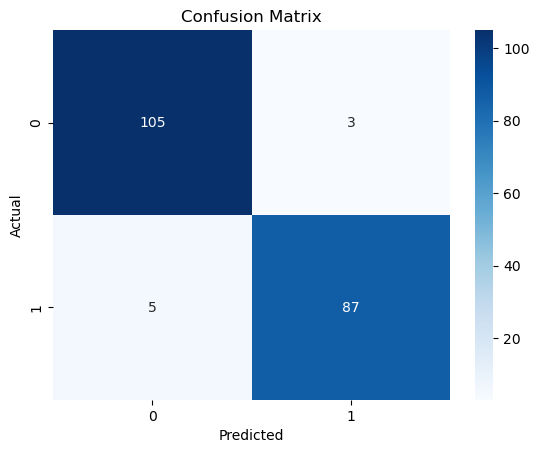

In [80]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()